<a href="https://colab.research.google.com/github/JamshedAl/codsoft_-1/blob/main/movie_genre_classification_tf_idf_countvector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [ ]:
import nltk
import os

custom_download_path = '/kaggle/working/nltk_data'

os.makedirs(custom_download_path, exist_ok=True)

nltk.data.path.append(custom_download_path)

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
train_data = pd.read_csv("/content/train_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data  = pd.read_csv("/content/test_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data_solution  = pd.read_csv("/content/test_data_solution.txt", delimiter=':::' ,header = None ,engine='python')

In [ ]:
print("shape",train_data.shape)
train_data.head()


shape (54214, 4)


0                                   1           2  \
0  1       Oscar et la dame rose (2009)       drama    
1  2                       Cupid (1997)    thriller    
2  3   Young, Wild and Wonderful (1980)       adult    
3  4              The Secret Sin (1915)       drama    
4  5             The Unrecovered (2007)       drama    

                                                   3  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [ ]:
print("shape",test_data_solution.shape)
test_data_solution.head()

shape (54200, 4)


0                              1              2  \
0  1          Edgar's Lunch (1998)       thriller    
1  2      La guerra de papá (1977)         comedy    
2  3   Off the Beaten Track (2010)    documentary    
3  4        Meu Amigo Hindu (2015)          drama    
4  5             Er nu zhai (1955)          drama    

                                                   3  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...

In [ ]:
df = pd.concat((train_data ,test_data_solution))
df.columns = ["id" ,"Title","Genre","Description"]
df.head()

id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [ ]:
df.shape

(108414, 4)

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [ ]:
df.isna().sum()  df.dropna( inplace = True )

In [ ]:
df.shape

(108414, 4)

In [ ]:
stopword = set(stopwords.words('english'))
def preprocessing(text):

    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[#@\$]', '', text)
    tokens = word_tokenize(text)


    lemmatizer  = WordNetLemmatizer()

    text = text.split()

    text = [word for word in text if word not in stopword]


    return " ".join(text)



In [ ]:
df["Despcription_clean"] =  df["Description"].apply(preprocessing)

In [ ]:
df.head()

id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   
2   As the bus empties the students for their fie...   
3   To help their unemployed father make ends mee...   
4   The film's title refers not only to the un-re...   

                                  Despcription_clean  
0  listening conversation doctor parents 10yearol...  
1  brother sister past incestuous relationship cu...  
2  bus empties students field trip museum natural...  
3  help unemployed father make ends meet edith tw...  
4  films title refers unrecovered bodies ground z...

In [ ]:

df["Genre"].value_counts()

 drama           27225
 documentary     26192
 comedy          14893
 short           10145
 horror           4408
 thriller         3181
 action           2629
 western          2064
 reality-tv       1767
 family           1567
 adventure        1550
 music            1462
 romance          1344
 sci-fi           1293
 adult            1180
 crime            1010
 animation         996
 sport             863
 talk-show         782
 fantasy           645
 mystery           637
 musical           553
 biography         529
 history           486
 game-show         387
 news              362
 war               264
Name: Genre, dtype: int64

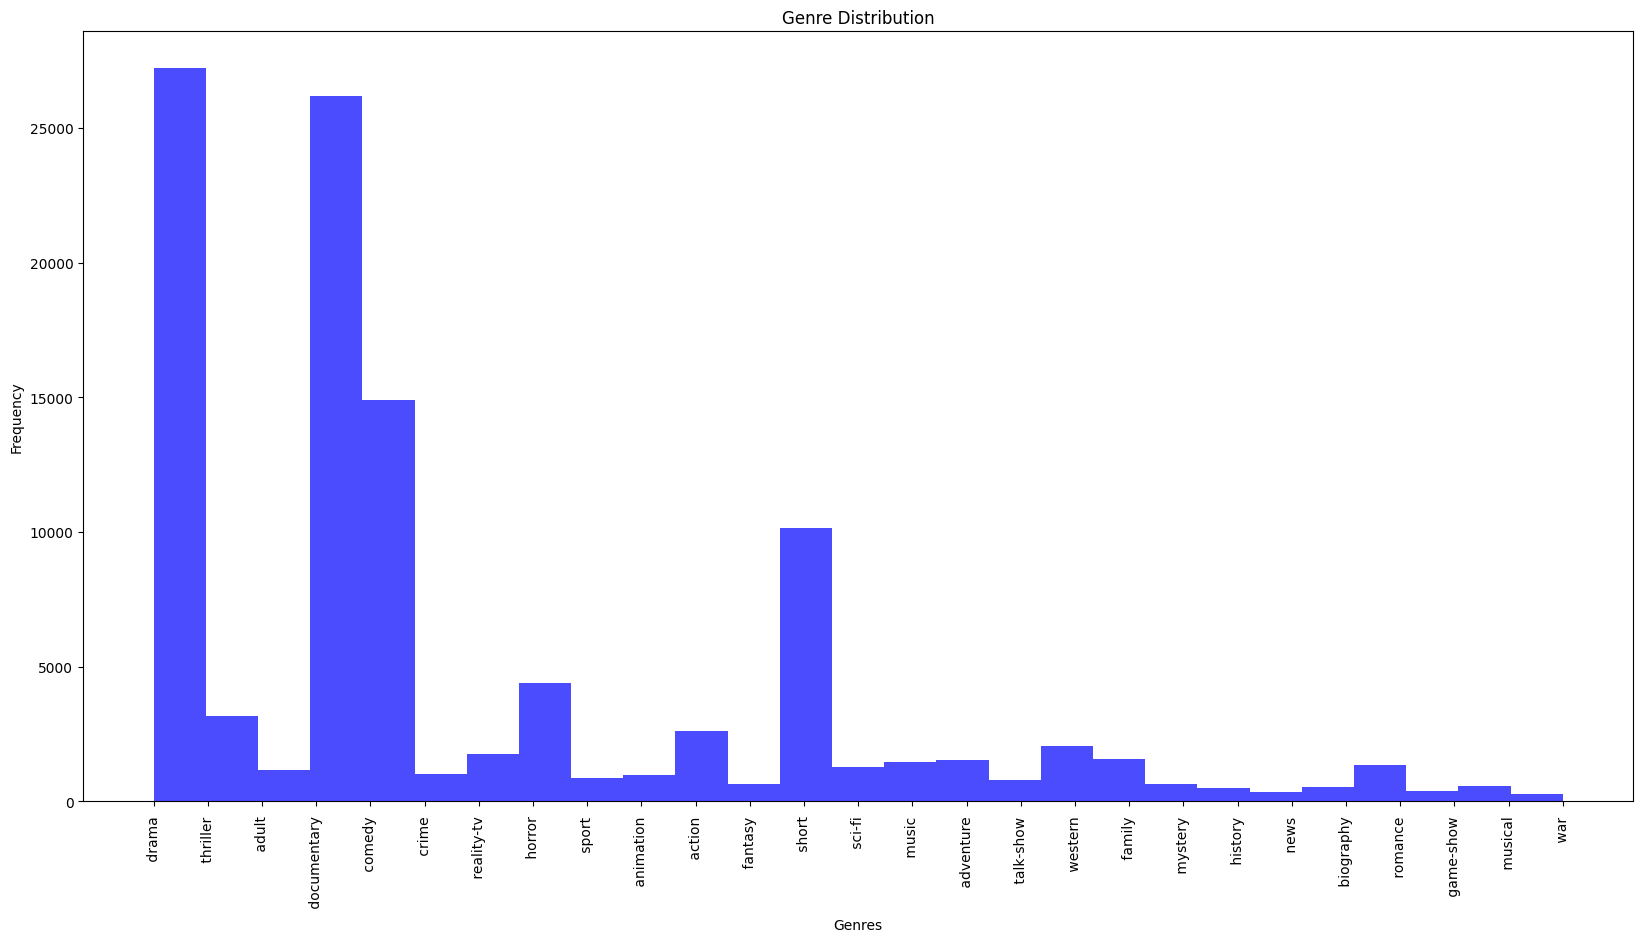

In [ ]:

plt.figure(figsize=(20, 10))
plt.hist(df["Genre"],bins =27 , color='blue', alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

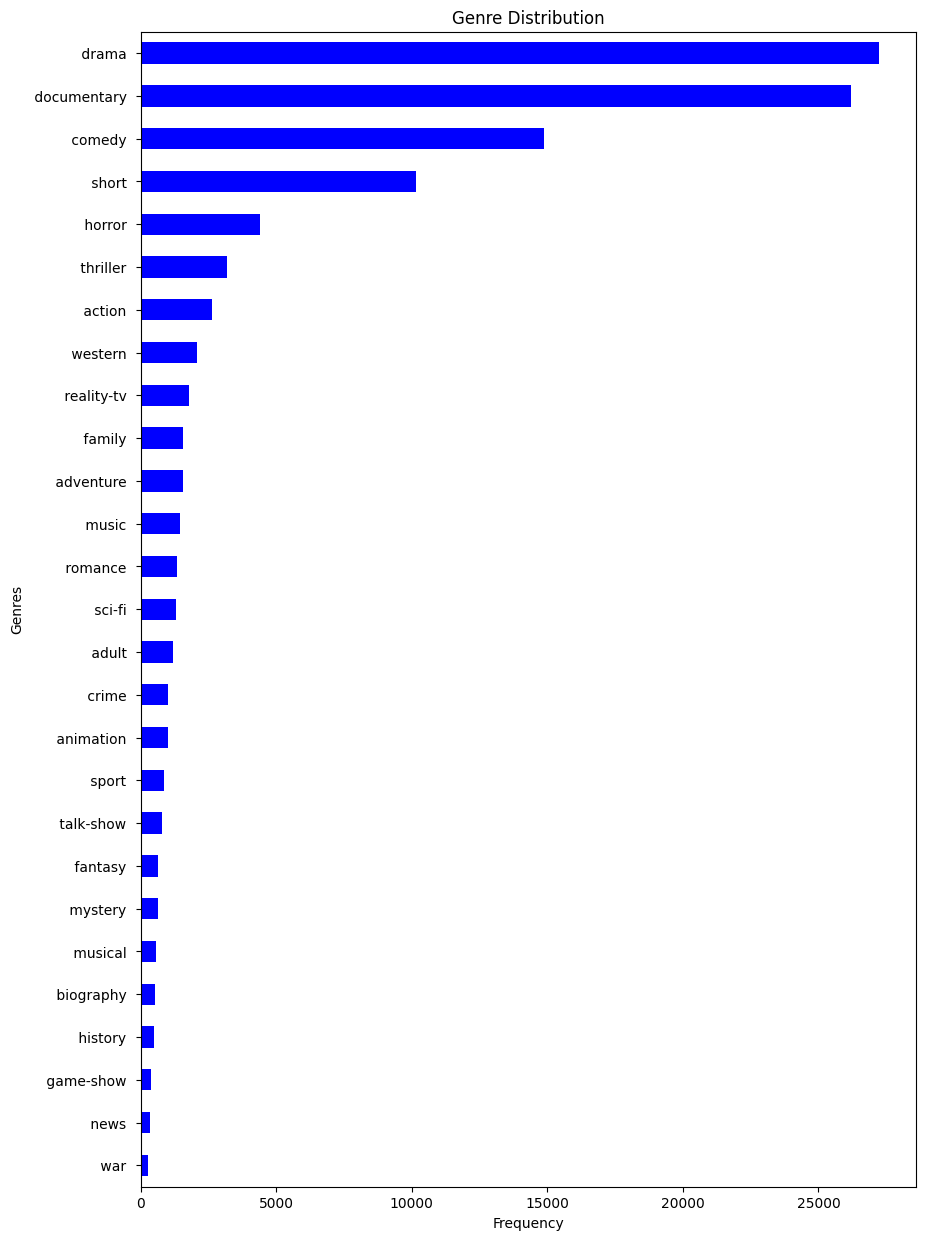

In [ ]:
genre_counts = df["Genre"].value_counts()
sorted_genres = genre_counts.sort_values(ascending=True)
plt.figure(figsize=(10, 15))
sorted_genres.plot(kind='barh',color = "blue", alpha=1 )
plt.title("Genre Distribution")
plt.xlabel("Frequency")
plt.ylabel("Genres")
plt.show()

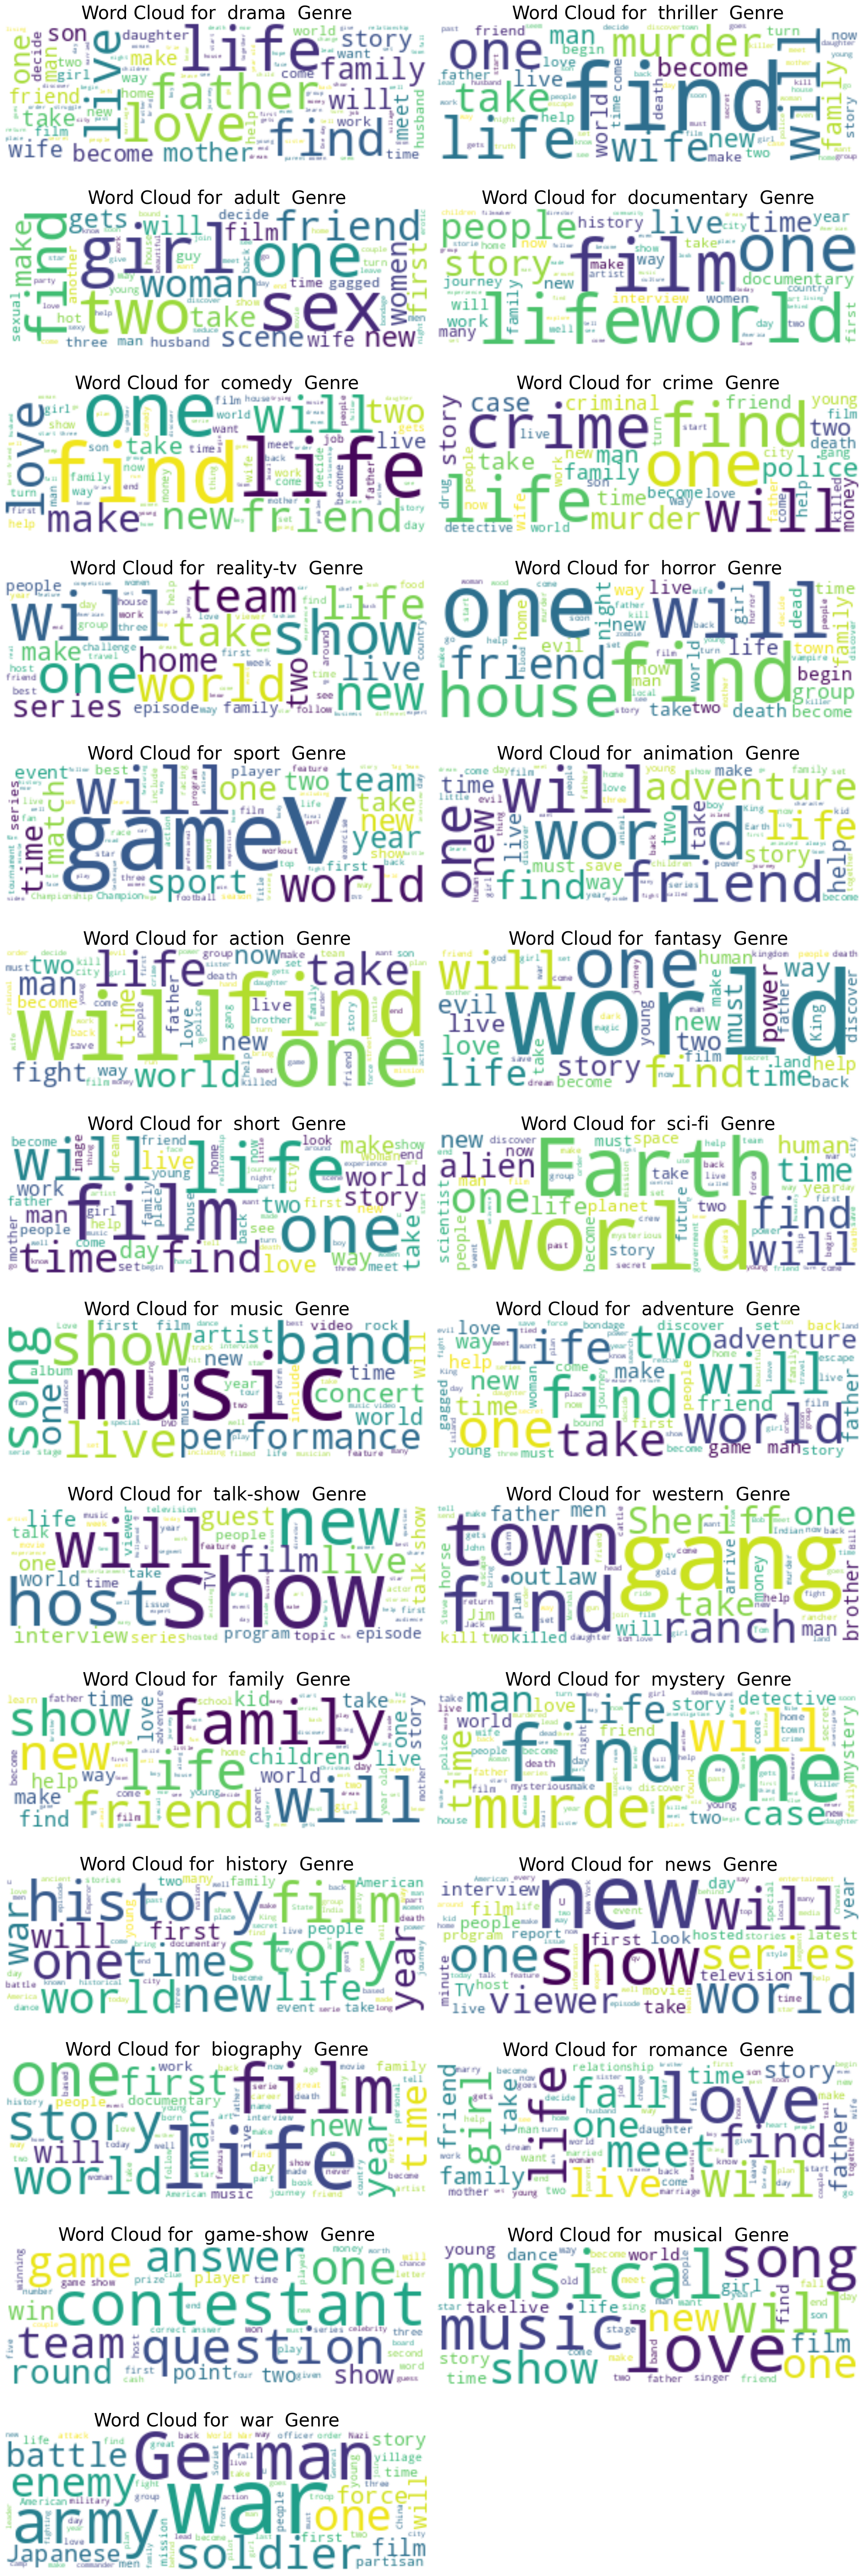

In [ ]:
genres = df['Genre'].unique()
plt.figure(figsize=(20, 60))
for i, genre in enumerate(genres, 1):
    plt.subplot(14, 2, i)
    text_subset = " ".join(list(df[df["Genre"] == genre]['Description']))
    wordcloud = WordCloud(max_words=300, width=300, height=100, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre',fontsize=30)
    plt.axis('off')


plt.tight_layout()
plt.show()


In [ ]:
data = df.drop(["Title","id"] , axis = 1)
data.head()


Genre                                        Description  \
0      drama    Listening in to a conversation between his do...   
1   thriller    A brother and sister with a past incestuous r...   
2      adult    As the bus empties the students for their fie...   
3      drama    To help their unemployed father make ends mee...   
4      drama    The film's title refers not only to the un-re...   

                                  Despcription_clean  
0  listening conversation doctor parents 10yearol...  
1  brother sister past incestuous relationship cu...  
2  bus empties students field trip museum natural...  
3  help unemployed father make ends meet edith tw...  
4  films title refers unrecovered bodies ground z...

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [ ]:
data.head()

Genre                                        Description  \
0      drama    Listening in to a conversation between his do...   
1   thriller    A brother and sister with a past incestuous r...   
2      adult    As the bus empties the students for their fie...   
3      drama    To help their unemployed father make ends mee...   
4      drama    The film's title refers not only to the un-re...   

                                  Despcription_clean  Genre_encoded  
0  listening conversation doctor parents 10yearol...              8  
1  brother sister past incestuous relationship cu...             24  
2  bus empties students field trip museum natural...              1  
3  help unemployed father make ends meet edith tw...              8  
4  films title refers unrecovered bodies ground z...              8

In [ ]:
x = data["Despcription_clean"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

In [ ]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

Model Score on Training data 0.9963288874130647
Model Score on Training data 0.5681554042835796
               precision    recall  f1-score   support

      action        0.35      0.44      0.39      1058
       adult        0.37      0.64      0.47       349
   adventure        0.23      0.41      0.29       421
   animation        0.19      0.38      0.26       240
   biography        0.00      0.05      0.01        22
      comedy        0.59      0.52      0.55      8250
       crime        0.06      0.18      0.09       175
 documentary        0.78      0.71      0.74     14510
       drama        0.68      0.56      0.62     16441
      family        0.15      0.33      0.21       367
     fantasy        0.09      0.21      0.12       125
   game-show        0.61      0.79      0.69       147
     history        0.02      0.14      0.03        28
      horror        0.59      0.63      0.61      2096
       music        0.52      0.64      0.58       618
     musical        0.0

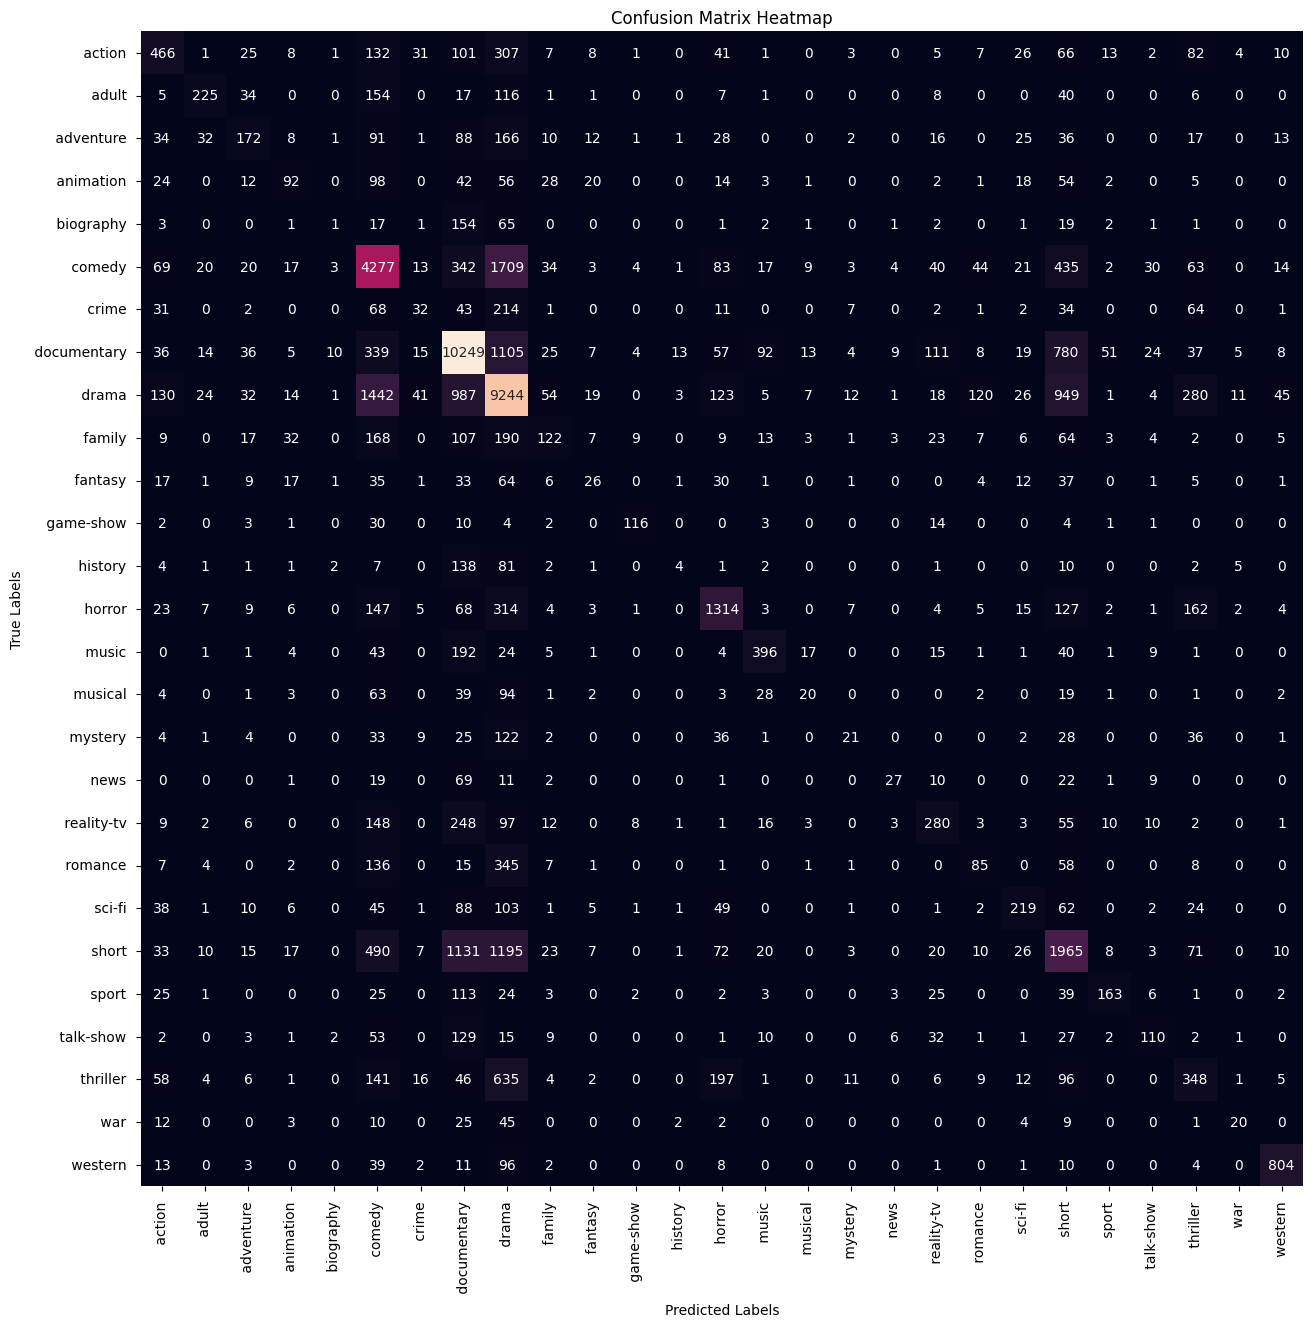

In [ ]:
model = LogisticRegression()
model.fit(x_train1 ,y_train)
print("Model Score on Training data",model.score(x_train1 ,y_train))
print("Model Score on Training data",model.score(x_test1 ,y_test))
y_pred = model.predict(x_test1)
print(classification_report(y_pred ,y_test))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()